### Лабораторная работа 2: основные понятия

В сегодняшней лабораторной будем работать с данными о проданных на аукционе автомобилях (`Carvana Car Prediction`). Целевым признаком здесь является наличие скрытых продавцом существенных недостатков. 

Carvana &mdash; компания-перекупщик автомобилей, соответственно, ее задача &mdash; не допустить скупку автомобилей со скрытыми недостатками, так как их впоследствии тяжелее продавать.

## 1

Загрузите данные о проданных на аукционе автомобилях. Посмотрите на "сырые" данные. 

Просмотрите файл `DataDictionary-ru.txt` и поймите, что означают столбцы матрицы. Выведите статистику по столбцам.


In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('data.csv')
df.head()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,...,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,...,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,...,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,...,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,...,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020


In [3]:
df.describe()

,RefId,IsBadBuy,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
count,72983.000000,72983.000000,72983.000000,72983.000000,69814.000000,72983.000000,72965.000000,72965.000000,72965.000000,72965.000000,72668.000000,72668.000000,72668.000000,72668.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000
mean,36511.428497,0.122988,2005.343052,4.176644,1.494299,71499.995917,6128.909217,7373.636031,8497.034332,9850.928240,6132.081287,7390.681827,8775.723331,10145.385314,26345.842155,58043.059945,6730.934326,0.025280,1276.580985
std,21077.241302,0.328425,1.731252,1.712210,0.521290,14578.913128,2461.992768,2722.491986,3156.285284,3385.789541,2434.567723,2686.248852,3090.702941,3310.254351,25717.351219,26151.640415,1767.846435,0.156975,598.846788
min,1.000000,0.000000,2001.000000,0.000000,0.000000,4825.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,835.000000,2764.000000,1.000000,0.000000,462.000000
25%,18257.500000,0.000000,2004.000000,3.000000,1.000000,61837.000000,4273.000000,5406.000000,6280.000000,7493.000000,4275.000000,5414.000000,6536.000000,7784.000000,17212.000000,32124.000000,5435.000000,0.000000,837.000000
50%,36514.000000,0.000000,2005.000000,4.000000,1.000000,73361.000000,6097.000000,7303.000000,8444.000000,9789.000000,6062.000000,7313.000000,8729.000000,10103.000000,19662.000000,73108.000000,6700.000000,0.000000,1155.000000
75%,54764.500000,0.000000,2007.000000,5.000000,2.000000,82436.000000,7765.000000,9021.000000,10651.000000,12088.000000,7736.000000,9013.000000,10911.000000,12309.000000,22808.000000,80022.000000,7900.000000,0.000000,1623.000000
max,73014.000000,1.000000,2010.000000,9.000000,3.000000,115717.000000,35722.000000,36859.000000,39080.000000,41482.000000,35722.000000,36859.000000,39080.000000,41062.000000,99761.000000,99224.000000,45469.000000,1.000000,7498.000000


# 2

Постройте график рассеяния с пробегом в качестве оси абсцисс и ценой `MMRCurrentRetailAveragePrice` в качестве оси ординат. Автомобили без недостатков отметьте зеленым цветом, со скрытыми недостатками — красным.

In [4]:
df[['RefId', 'IsBadBuy','VehOdo']].head()
# df.head()

,RefId,IsBadBuy,VehOdo
0,1,0,89046
1,2,0,93593
2,3,0,73807
3,4,0,65617
4,5,0,69367


In [5]:
wo_defect = df['IsBadBuy'] == 0
with_defect = df['IsBadBuy'] == 1

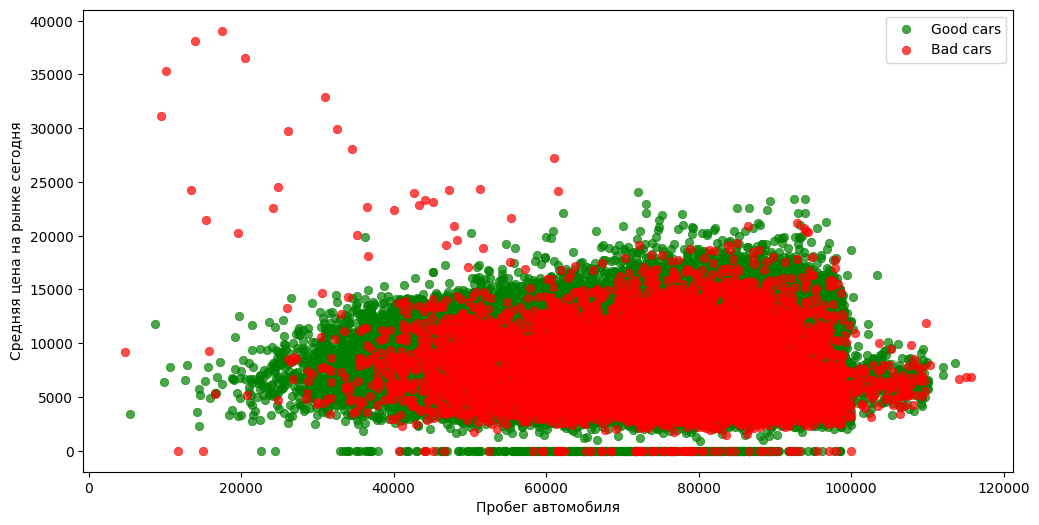

In [6]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.scatter(df.loc[wo_defect, 'VehOdo'], df.loc[wo_defect, 'MMRCurrentRetailAveragePrice'], c='green', alpha=0.7, linewidth=0.6)
ax.scatter(df.loc[with_defect, 'VehOdo'], df.loc[with_defect, 'MMRCurrentRetailAveragePrice'], c='red', alpha=0.7, linewidth=0.6)

plt.xlabel("Пробег автомобиля")
plt.ylabel("Средняя цена на рынке сегодня")

ax.legend(['Good cars', 'Bad cars'])

plt.show()

# Регрессия

## 3a

Импортируйте из библиотеки `sklearn` все модели машинного обучения:

`from sklearn import *`

Трактуя задачу о предсказании наличия недостатков как задачу регрессии, натренируйте линейную модель [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) на каком-нибудь подмножестве признаков (например, тех же `VehOdo` и `MMRCurrentRetailAveragePrice`). 

С какой проблемой вы столкнулись? Какие способы ее решения вы можете предложить?

*Функции, которые могут пригодиться при решении: `.fit(), .loc[], pd.notnull()`*

*Создание модели:* `model1 = linear_model.LinearRegression()`

*Тренировка:*
`model1.fit(x, y)`



In [7]:
from sklearn import *

In [8]:
model1 = linear_model.LinearRegression()

In [9]:
ts = df.head(51088)
vs = df.tail(21895)

# ts_x = ts.loc[ts[['VehOdo', 'MMRCurrentRetailAveragePrice']].notnull(), ['VehOdo', 'MMRCurrentRetailAveragePrice']]
ts_X = ts.loc[ts['MMRCurrentRetailAveragePrice'].notnull(), ['VehOdo', 'MMRCurrentRetailAveragePrice']]
# len(ts_X)
print(ts_X)

ts_y = ts.loc[ts['MMRCurrentRetailAveragePrice'].notnull(), 'IsBadBuy']
# ts_y
model1.fit(ts_X, ts_y)

       VehOdo  MMRCurrentRetailAveragePrice
0       89046                       11597.0
1       93593                       11374.0
2       73807                        7146.0
3       65617                        4375.0
4       69367                        6739.0
...       ...                           ...
51083   83645                        7953.0
51084   86231                        7082.0
51085   87907                        9382.0
51086   81497                        9067.0
51087   69591                        9798.0

[50871 rows x 2 columns]


LinearRegression()

## 3b

Выполните предсказание для всех объектов обучающей выборки и присвойте результат переменной prediction

*Функции, которые могут пригодиться при решении: `model.predict()`*

In [10]:
vs_X = vs.loc[vs['MMRCurrentRetailAveragePrice'].notnull(), ['VehOdo', 'MMRCurrentRetailAveragePrice']]
vs_y = vs.loc[vs['MMRCurrentRetailAveragePrice'].notnull(), 'IsBadBuy']
pred_y = model1.predict(vs_X)
pred_y

array([0.1541725 , 0.13255906, 0.15842421, ..., 0.11983713, 0.1203947 ,
       0.07583069])

## 3c

Преобразуйте получившийся вектор предсказаний `prediction` к значениям `{0,1}`. Это можно сделать, например, используя list comprehensions: https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions 

`predictionClass = [1 if prediction[i] > 0.5 else 0 for i in range(prediction.shape[0])]`

In [11]:
thresholds = [.1, .15, .17, .20, .25, .30]
for threshold in thresholds:
    pred_y_rounded = [1 if pred_y[i] > threshold else 0 for i in range(pred_y.shape[0])]
    print(f"\n\nPREC_POINT: #{threshold}\n\n")
    print(metrics.classification_report(vs_y, pred_y_rounded))
    print(metrics.confusion_matrix(vs_y, pred_y_rounded))
    print(f"\nACCURACY SCORE for {threshold}: {metrics.accuracy_score(vs_y, pred_y_rounded)}")



PREC_POINT: #0.1


              precision    recall  f1-score   support

           0       0.91      0.38      0.54     18941
           1       0.16      0.76      0.26      2856

    accuracy                           0.43     21797
   macro avg       0.54      0.57      0.40     21797
weighted avg       0.81      0.43      0.50     21797

[[ 7230 11711]
 [  682  2174]]

ACCURACY SCORE for 0.1: 0.4314355186493554


PREC_POINT: #0.15


              precision    recall  f1-score   support

           0       0.89      0.79      0.84     18941
           1       0.21      0.37      0.27      2856

    accuracy                           0.74     21797
   macro avg       0.55      0.58      0.55     21797
weighted avg       0.80      0.74      0.76     21797

[[14971  3970]
 [ 1788  1068]]

ACCURACY SCORE for 0.15: 0.7358352066798183


PREC_POINT: #0.17


              precision    recall  f1-score   support

           0       0.88      0.90      0.89     18941
           1       0.

/home/touka/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/touka/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/touka/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 3d

Постройте отчет по качеству классификации и матрицу ошибок. Как изменятся отчет и матрица ошибок, если изменить порог в задании 3c (по умолчанию его значение равно 0.5)?

*Функции, которые могут пригодиться при решении: `print(metrics.classification_report(...))`, `print(metrics.confusion_matrix(...))`*

Функция classification_report для каждого класса объектов считает точность (precision) в этом классе и полноту (recall). Полнота - это процент объектов данного класса, которые ваш метод предсказания тоже отнес к этому классу, среди всех объектов данного класса. Точность (precision) - то же самое, только среди всех объектов, предсказанных для этого класса.

Функция confusion_matrix возвращает матрицу с количествами объектов. Номера столбцов матрицы - это номера предсказанных классов, строки - это номера правильных классов. Например, элемент M[0,1] - это количество машин, где на самом деле IsBadBuy = 0, а вы предсказали 1.

# Классификация

## 4a
Трактуя задачу как задачу классификации, постройте модель классификации «решающее дерево» глубины 20  (все аналогично линейной регрессии).


*Функции, которые могут пригодиться при решении: `tree.DecisionTreeClassifier(max_depth=20) `*

In [12]:
model2 = tree.DecisionTreeClassifier(max_depth=20)
model2.fit(ts_X, ts_y)

DecisionTreeClassifier(max_depth=20)

## 4b

Решающее дерево предсказывает вероятности. С помощью построенной модели рассчитайте вероятности наличия скрываемых недостатков.

*Функции, которые могут пригодиться при решении: `model.predict_proba() `*

In [13]:
pred_y = model2.predict_proba(vs_X)
pred_y

array([[1.        , 0.        ],
       [0.85032895, 0.14967105],
       [1.        , 0.        ],
       ...,
       [0.87678571, 0.12321429],
       [0.93877551, 0.06122449],
       [0.93799264, 0.06200736]])

## 4c

Преобразуйте получившийся вектор предсказаний `prediction` к значениям `{0,1}`. Постройте отчет о классификации и матрицу ошибок. Какой метод оказался лучше?

In [14]:
for threshold in thresholds:
#     pred_y_rounded = (pred_y[:, 0] > acc).astype(int)
    pred_y_rounded = [1 if pred_y[i, 1] > threshold else 0 for i in range(pred_y.shape[0])]
    print(f"\n\n\nPREC_POINT: {threshold}\n\n")
    print(metrics.classification_report(vs_y, pred_y_rounded))
    print(metrics.confusion_matrix(vs_y, pred_y_rounded))
    print(f"\nACCURACY SCORE for {threshold}: {metrics.accuracy_score(vs_y, pred_y_rounded)}")




PREC_POINT: 0.1


              precision    recall  f1-score   support

           0       0.88      0.63      0.73     18941
           1       0.15      0.45      0.23      2856

    accuracy                           0.60     21797
   macro avg       0.52      0.54      0.48     21797
weighted avg       0.79      0.60      0.67     21797

[[11846  7095]
 [ 1563  1293]]

ACCURACY SCORE for 0.1: 0.6027893746845896



PREC_POINT: 0.15


              precision    recall  f1-score   support

           0       0.88      0.86      0.87     18941
           1       0.18      0.21      0.19      2856

    accuracy                           0.77     21797
   macro avg       0.53      0.53      0.53     21797
weighted avg       0.79      0.77      0.78     21797

[[16260  2681]
 [ 2263   593]]

ACCURACY SCORE for 0.15: 0.773179795384686



PREC_POINT: 0.17


              precision    recall  f1-score   support

           0       0.88      0.88      0.88     18941
           1       0.1

# Кросс-валидация
## 5a


Разделите исходную выборку на две части, например, используя [slices](https://pythonz.net/references/named/slice/):

`dataTrain = data.loc[0:34999,]
dataTest = data.loc[35000:69999,]`

In [15]:
# место для кода

## 5b

Натренируйте решающее дерево на  `dataTrain` и примените к  `dataTrain` и dataTest, вычислив для каждого случая точность предсказания. 

Проведите несколько экспериментов для различных глубин дерева. Напишите в комментариях, для каких глубин модель недообучена, для каких переобучена и где точка раннего останова.

*Функции, которые могут пригодиться при решении: `metrics.accuracy_score() `*

In [16]:
depths = np.arange(1, 21)
train_accuracy = []
validation_accuracy = []

threshold = 0.2

for depth in depths:
    model = tree.DecisionTreeClassifier(max_depth=depth)
    model.fit(ts_X, ts_y)
    
    pred_y = model.predict_proba(ts_X)
    pred_y_rounded = [1 if pred_y[i, 1] > threshold else 0 for i in range(pred_y.shape[0])]
    train_accuracy.append(metrics.accuracy_score(ts_y, pred_y_rounded))
    
    pred_y = model.predict_proba(vs_X)
    pred_y_rounded = [1 if pred_y[i, 1] > threshold else 0 for i in range(pred_y.shape[0])]
    validation_accuracy.append(metrics.accuracy_score(vs_y, pred_y_rounded))

In [17]:
result_data = {'tree_depth': depths, 'train_set_accuracy': train_accuracy, 'validation_set_accuracy': validation_accuracy}
result_df = pd.DataFrame(data=result_data)
result_df

,tree_depth,train_set_accuracy,validation_set_accuracy
0,1,0.880325,0.868973
1,2,0.822355,0.818645
2,3,0.822649,0.818966
3,4,0.858918,0.849521
4,5,0.856696,0.846584
5,6,0.861296,0.848328
6,7,0.855694,0.841767
7,8,0.850878,0.832638
8,9,0.854652,0.833188
9,10,0.852352,0.825572


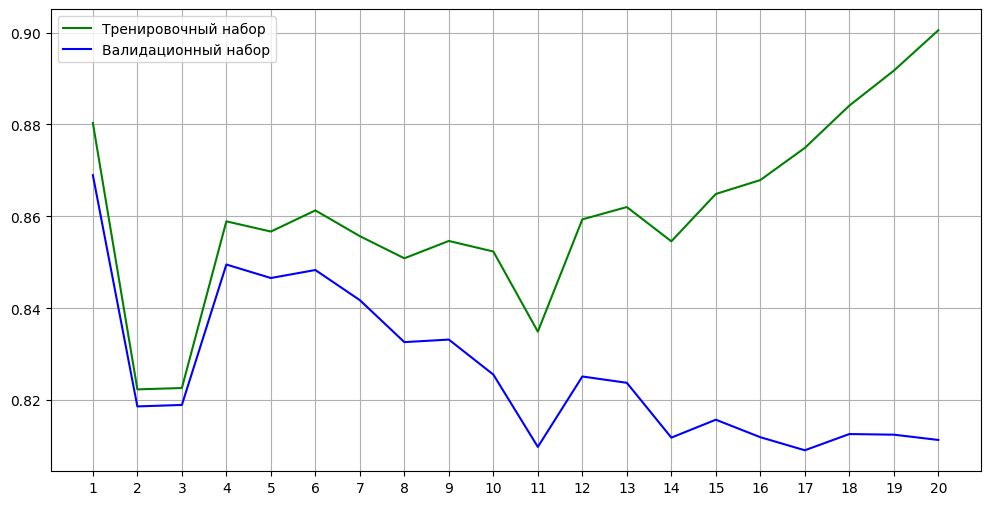

In [27]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(result_df['tree_depth'], result_df['train_set_accuracy'], c='green')
ax.plot(result_df['tree_depth'], result_df['validation_set_accuracy'], c='blue')
plt.xticks(np.arange(1, 21, step=1))
plt.grid(True)
ax.legend(['Тренировочный набор', 'Валидационный набор'])
plt.show()


# Решающая функция
## 6a

Вернемся к модели решающего дерева глубины 20, построенного по всей обучающей выборке `data`. Пусть цена ошибки неправильного предсказания 0 равна 1000, а неправильного предсказания 1 — 100.

Вычислите функцию потерь &mdash; среднюю ошибку на всей обучающей выборке.

In [19]:
def lost(conf_matrix, size, zero_err = 1000, one_err = 100) -> float:
    FN = conf_matrix[1, 0]
    FP = conf_matrix[0, 1]
    
    return (FN * zero_err + FP * one_err) / size
cm = metrics.confusion_matrix(vs_y, pred_y_rounded)
print(cm)
lost(cm, vs_y.shape[0])

[[17268  1673]
 [ 2439   417]]


119.57150066522917

## 6b

Выясните, как нужно изменить решающую функцию `[0 if predictionProb[i][0] > 0.5 else 1 for i in range(prediction.shape[0])]`, чтобы функция потерь была минимальна?

Найдите оптимальную решающую функцию и минимальное значение функционала потерь методом подбора или пользуясь формулой из лекции 2 (слайд Decision function).



In [20]:
optimal_threshold = 0.01
model = tree.DecisionTreeClassifier(max_depth=20)
model.fit(ts_X, ts_y)
pred_y = model.predict_proba(vs_X)
pred_y_rounded = [1 if pred_y[i, 1] > optimal_threshold else 0 for i in range(pred_y.shape[0])]
cm = metrics.confusion_matrix(vs_y, pred_y_rounded)
optimal_model_accuracy = lost(cm, vs_y.shape[0])

In [26]:
for temp_threshold in np.arange(0.02, 1, 0.01):
    temp_threshold = round(temp_threshold, 2)
    model = tree.DecisionTreeClassifier(max_depth=20)
    model.fit(ts_X, ts_y)
    pred_y = model.predict_proba(vs_X)
    pred_y_rounded = [1 if pred_y[i, 1] > temp_threshold else 0 for i in range(pred_y.shape[0])]
    temp_cm = metrics.confusion_matrix(vs_y, pred_y_rounded)
    temp_accuracy = lost(temp_cm, vs_y.shape[0])
    print(temp_threshold, "\t", temp_accuracy)
    
    if temp_accuracy < optimal_model_accuracy:
        optimal_model_accuracy = temp_accuracy
        optimal_threshold = temp_threshold
        cm = temp_cm
        

0.02 	 101.75253475248887
0.03 	 101.85346607331284
0.04 	 101.9773363306877
0.05 	 101.63325228242418
0.06 	 101.61948892049365
0.07 	 101.31669495802174
0.08 	 102.00945084185898
0.09 	 103.44542826994541
0.1 	 104.00972610909758
0.11 	 104.69789420562462
0.12 	 106.56512364086801
0.13 	 113.6945451208882
0.14 	 114.61210258292425
0.15 	 115.98385098866817
0.16 	 117.06198100656053
0.17 	 117.30972152131027
0.18 	 117.22714134972702
0.19 	 118.96591274028536
0.2 	 119.47056934440519
0.21 	 120.22296646327476
0.22 	 120.41106574299215
0.23 	 120.73221085470477
0.24 	 120.70468413084369
0.25 	 121.51672248474561
0.26 	 121.36532550350965
0.27 	 123.26925723723448
0.28 	 124.31986053126577
0.29 	 125.37505161260724
0.3 	 125.2190668440611
0.31 	 125.24659356792219
0.32 	 126.12286094416663
0.33 	 125.86594485479654
0.34 	 126.39354039546727
0.35 	 126.57705188787448
0.36 	 126.43941826856907
0.37 	 126.67339542138826
0.38 	 126.60457861173556
0.39 	 126.90278478689729
0.4 	 127.10923521

In [22]:
print(cm)
print(optimal_threshold)
print(optimal_model_accuracy)

[[ 8627 10314]
 [ 1178  1678]]
0.06999999999999999
101.36257283112354


In [23]:
np.arange(0.02, 1, 0.01)

array([0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11, 0.12,
       0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22, 0.23,
       0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33, 0.34,
       0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44, 0.45,
       0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56,
       0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67,
       0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78,
       0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89,
       0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])